In [2]:
import pandas as pd

fruits = pd.read_csv("../Data/fruits.csv")
fruits.head()

,length,weight,name
0,25.4,242.0,apple
1,26.3,290.0,apple
2,26.5,340.0,apple
3,29.0,363.0,apple
4,29.0,430.0,apple


### Feature Set과 Target Set을 Numpy Array로 변경

In [3]:
import numpy as np

In [4]:
testA = np.array([1,2,3,4])
testB = np.array([10,20,30,40])

In [5]:
# 2개의 Array를 묶어서 컬럼기반 하나의 array로 만들기
combineA = [[i,j] for i, j in zip(testA, testB)]
np.array(combineA)

array([[ 1, 10],
       [ 2, 20],
       [ 3, 30],
       [ 4, 40]])

In [6]:
combineB = np.column_stack((testA, testB))
combineB

array([[ 1, 10],
       [ 2, 20],
       [ 3, 30],
       [ 4, 40]])

In [7]:
combineC = np.row_stack((testA, testB))
combineC

array([[ 1,  2,  3,  4],
       [10, 20, 30, 40]])

In [8]:
fruit_data = np.column_stack((fruits.length, fruits.weight))
fruit_data[:5]

array([[ 25.4, 242. ],
       [ 26.3, 290. ],
       [ 26.5, 340. ],
       [ 29. , 363. ],
       [ 29. , 430. ]])

In [9]:
# pandas > numpy : numpy가 퍼포먼스가 더 좋다
fruit_target = np.array(fruits['name'])
fruit_target

array(['apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple',
       'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple',
       'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple',
       'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple',
       'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple',
       'berry', 'berry', 'berry', 'berry', 'berry', 'berry', 'berry',
       'berry', 'berry', 'berry', 'berry', 'berry', 'berry', 'berry'],
      dtype=object)

In [10]:
# train과 test로 분리
from sklearn.model_selection import train_test_split

In [11]:
train_input, test_input, train_target, test_target = train_test_split(
    fruit_data,
    fruit_target,
    stratify=fruit_target,
    random_state=42
)

In [12]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [13]:
fruits

,length,weight,name
0,25.4,242.0,apple
1,26.3,290.0,apple
2,26.5,340.0,apple
3,29.0,363.0,apple
4,29.0,430.0,apple
5,29.7,450.0,apple
6,29.7,500.0,apple
7,30.0,390.0,apple
8,30.0,450.0,apple
9,30.7,500.0,apple


---
### 수상한 과일?

In [15]:
kn.predict([[25, 150]])

array(['berry'], dtype=object)

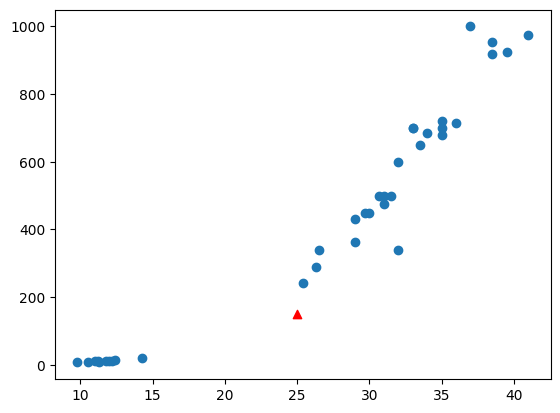

In [18]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^', c='red')

plt.show()
# x, y 데이터 범위가 다르다

### 이웃을 출력

In [19]:
distances, indexes = kn.kneighbors([[25, 150]])
print(indexes)  # 가장 근처 데이터 인덱스번호 알려줌

[[11 20 13 22 15]]


In [20]:
train_input[indexes]

array([[[ 25.4, 242. ],
        [ 14.3,  19.7],
        [ 12.4,  13.4],
        [ 12.2,  12.2],
        [ 26.3, 290. ]]])

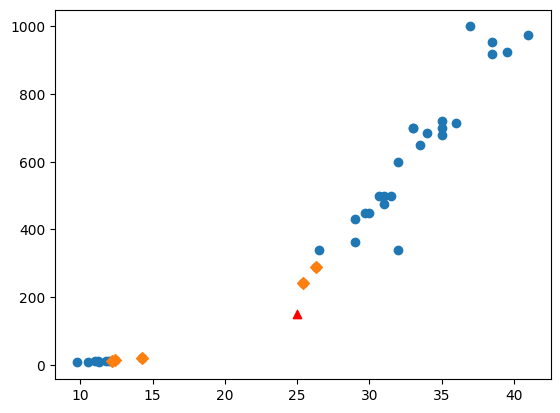

In [21]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^', c='red')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker='D')
plt.show()

In [22]:
train_target[indexes]

array([['apple', 'berry', 'berry', 'berry', 'apple']], dtype=object)

## 기준을 맞춘다
- x, y 축 데이터범위

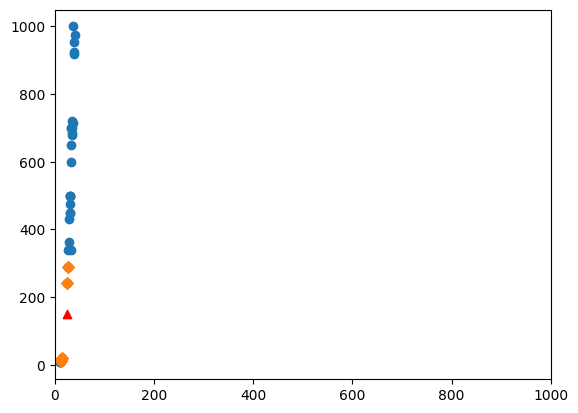

In [23]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^', c='red')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker='D')
plt.xlim(0,1000)
plt.show()

In [24]:
# 표준편차 차이가 심하면 못 쓰는 데이터
# length와 weight의 평균과 표준편차를 구해서 비교해보자
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)
print(mean, std)    # 평균과 표준편차가 심하다

[ 26.93333333 441.98333333] [ 10.09141549 325.61300692]


---
### train_data를 표준점수(Z점수) 변경하자
표준점수 = (Feature - 평균) / 표준편차      # 변동계수

In [27]:
train_scaled = (train_input - mean) / std
train_scaled

array([[ 0.79935928,  0.85382543],
       [ 0.20479453, -0.24256812],
       [-1.54917151, -1.33066961],
       [ 0.37325454,  0.17817675],
       [-1.55908092, -1.32729137],
       [ 1.14618873,  1.46805151],
       [-1.49962444, -1.32698425],
       [ 0.50207691,  0.48528979],
       [-1.47980562, -1.32729137],
       [ 0.89845341,  0.83539865],
       [ 0.60117103,  0.79240283],
       [-0.15194433, -0.61417489],
       [ 0.99754754,  1.71374194],
       [-1.44016797, -1.3162353 ],
       [-1.69781269, -1.33681187],
       [-0.06275961, -0.46676063],
       [ 0.79935928,  0.73098022],
       [ 0.40298278,  0.17817675],
       [-1.57889974, -1.32759848],
       [ 0.27416042,  0.02462023],
       [-1.25188913, -1.29688718],
       [ 0.79935928,  0.79240283],
       [-1.45998679, -1.31992065],
       [ 0.45252984,  0.17817675],
       [ 1.39392404,  1.63696368],
       [ 0.6507181 ,  0.63884631],
       [ 0.60117103,  0.79240283],
       [-1.62844681, -1.33435497],
       [-0.04294079,

In [26]:
# sklearn
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_input)
train_scaled = scaler.transform(train_input)
train_scaled

array([[ 0.79935928,  0.85382543],
       [ 0.20479453, -0.24256812],
       [-1.54917151, -1.33066961],
       [ 0.37325454,  0.17817675],
       [-1.55908092, -1.32729137],
       [ 1.14618873,  1.46805151],
       [-1.49962444, -1.32698425],
       [ 0.50207691,  0.48528979],
       [-1.47980562, -1.32729137],
       [ 0.89845341,  0.83539865],
       [ 0.60117103,  0.79240283],
       [-0.15194433, -0.61417489],
       [ 0.99754754,  1.71374194],
       [-1.44016797, -1.3162353 ],
       [-1.69781269, -1.33681187],
       [-0.06275961, -0.46676063],
       [ 0.79935928,  0.73098022],
       [ 0.40298278,  0.17817675],
       [-1.57889974, -1.32759848],
       [ 0.27416042,  0.02462023],
       [-1.25188913, -1.29688718],
       [ 0.79935928,  0.79240283],
       [-1.45998679, -1.31992065],
       [ 0.45252984,  0.17817675],
       [ 1.39392404,  1.63696368],
       [ 0.6507181 ,  0.63884631],
       [ 0.60117103,  0.79240283],
       [-1.62844681, -1.33435497],
       [-0.04294079,

### 전처리 데이터로 모델 훈련하기

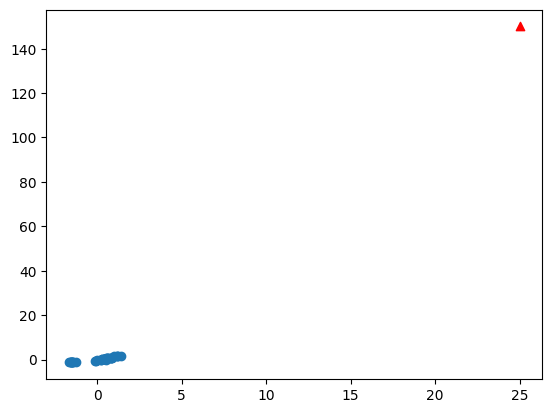

In [28]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(25, 150, marker='^', c='red')
plt.show()

In [29]:
# 예측할 데이터도 표준점수로 변경
new = ([25, 150]-mean)/std
new

array([-0.19158198, -0.89671889])

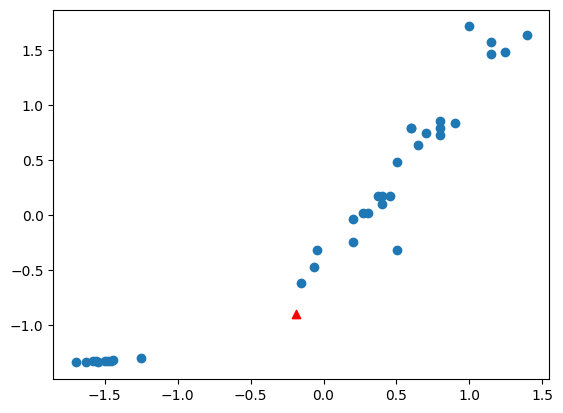

In [30]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^', c='red')

plt.show()

## KNN

In [31]:
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [32]:
test_scaled = (test_input - mean) / std         # train 데이터로 mean, std 구한다

> train한 데이터를 가지고 그대로 Test 하는 것!      
> 따로 다시 test 구하면 전혀 틀린 데이터가 되므로 의미가 없다.

In [33]:
# 정확도
kn.score(test_scaled, test_target)

1.0

In [34]:
kn.predict([new])   # 정답이 berry에서 apple로 바뀜

array(['apple'], dtype=object)

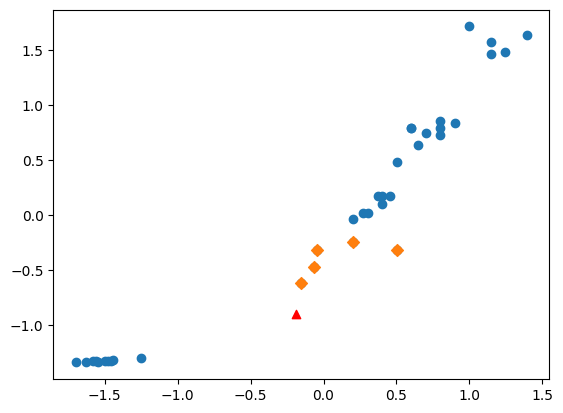

In [35]:
# 확인을 위해 이웃을 출력하자
distancess, indexes = kn.kneighbors([new])

plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^', c='red')
plt.scatter(train_scaled[indexes, 0], train_scaled[indexes,1], marker='D')
plt.show()

> 표준점수 = 표준화